In [73]:
#  Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [74]:
# load dataset
listings = pd.read_csv("/content/Listings.csv", encoding="ISO-8859-1", low_memory=False)
reviews = pd.read_csv("/content/Reviews.csv", encoding="ISO-8859-1", low_memory=False)

print("Listings shape:", listings.shape)
print("Reviews shape:", reviews.shape)



Listings shape: (279712, 33)
Reviews shape: (5373143, 4)


In [75]:
# Quick Overview
print("Listings columns:", listings.columns.tolist())
print("reviews columns:", reviews.columns.tolist())

print("Listings sample:\n", listings.head(3))
print("reviews sample:\n", reviews.head(3))


Listings columns: ['listing_id', 'name', 'host_id', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'district', 'city', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable']
reviews columns: ['listing_id', 'review_id', 'date', 'reviewer_id']
Listings sample:
    listing_id                                            name   host_id  \
0      281420  Beautiful Flat in le Village Montmartre, Paris   1466919   
1     3705183                 39 mÃÂ² Paris (Sacre CÃâur)  10328771   
2     4082273             Lovely apartment with Terrace,

In [76]:
# Price Cleaning
if 'price' in listings.columns:
    listings['price'] = (
        listings['price']
        .astype(str)
        .replace('[\$,]', '', regex=True)
        .astype(float)
    )

In [77]:
#  Missing Values
missing_listings = listings.isnull().mean().sort_values(ascending=False)
missing_reviews = reviews.isnull().mean().sort_values(ascending=False)

print("\nTop Missing in Listings:\n", missing_listings.head(10))
print("\nTop Missing in Reviews:\n", missing_reviews.head(10))

# Drop columns with >50% missing
listings = listings.dropna(thresh=len(listings) * 0.5, axis=1)
reviews = reviews.dropna(thresh=len(reviews) * 0.5, axis=1)


Top Missing in Listings:
 district                       0.867678
host_response_time             0.460409
host_response_rate             0.460409
host_acceptance_rate           0.404298
review_scores_value            0.328141
review_scores_location         0.328105
review_scores_checkin          0.328091
review_scores_accuracy         0.327884
review_scores_communication    0.327791
review_scores_cleanliness      0.327712
dtype: float64

Top Missing in Reviews:
 listing_id     0.0
review_id      0.0
date           0.0
reviewer_id    0.0
dtype: float64


In [78]:
# Feature Engineering (Listings)
if 'bedrooms' in listings.columns:
    listings['price_per_bedroom'] = listings['price'] / listings['bedrooms'].replace(0, np.nan)

if 'availability_365' in listings.columns:
    listings['occupancy_rate'] = listings['availability_365'] / 365

if 'price' in listings.columns:
    listings['price_category'] = pd.cut(
        listings['price'],
        bins=[0, 100, 300, 1000, np.inf],
        labels=['Budget', 'Standard', 'Premium', 'Luxury']
    )

In [79]:
# Reviews Processing
if 'comments' in reviews.columns:
    reviews['review_length'] = reviews['comments'].astype(str).apply(len)

if 'date' in reviews.columns:
    reviews['review_date'] = pd.to_datetime(reviews['date'], errors='coerce')


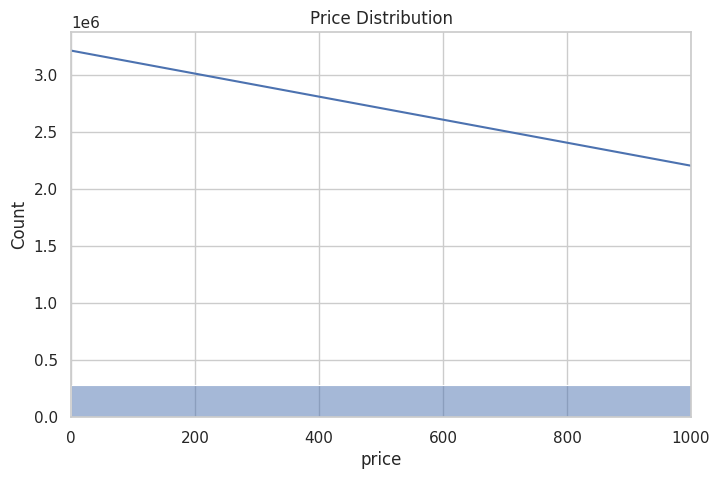

In [80]:
#  Price Distribution
if 'price' in listings.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(listings['price'], bins=50, kde=True)
    plt.xlim(0, 1000)
    plt.title("Price Distribution")
    plt.show()

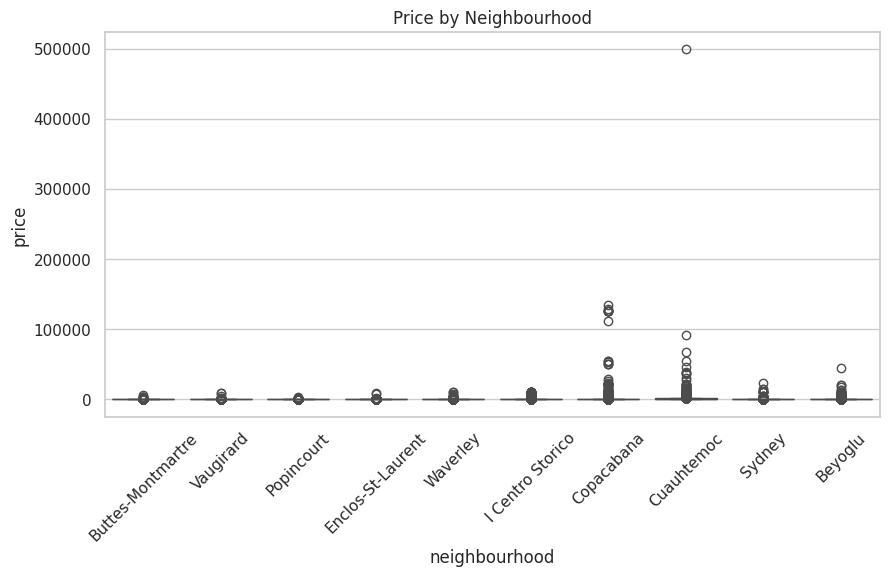

In [81]:
#  Price by Neighbourhood
if 'neighbourhood' in listings.columns:
    top_neigh = listings['neighbourhood'].value_counts().head(10).index
    plt.figure(figsize=(10, 5))
    sns.boxplot(
        x='neighbourhood',
        y='price',
        data=listings[listings['neighbourhood'].isin(top_neigh)]
    )
    plt.xticks(rotation=45)
    plt.title("Price by Neighbourhood")
    plt.show()

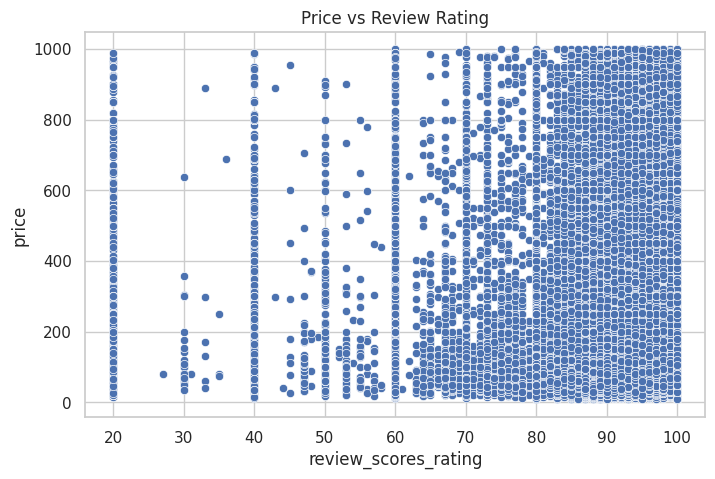

In [82]:
#  Scatter: Price vs Review Score
if 'review_scores_rating' in listings.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        x='review_scores_rating',
        y='price',
        data=listings[listings['price'] < 1000]
    )
    plt.title("Price vs Review Rating")
    plt.show()

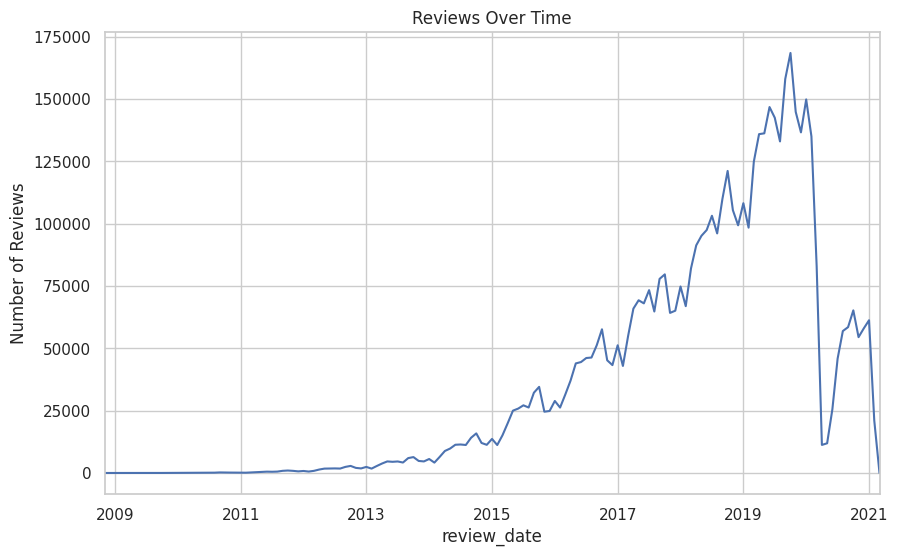

In [87]:
#  Review Activity Over Time
if 'review_date' in reviews.columns:
    reviews_per_month = reviews.groupby(pd.Grouper(key='review_date', freq='ME')).size()
    reviews_per_month.plot()
    plt.title("Reviews Over Time")
    plt.ylabel("Number of Reviews")
    plt.show()

In [84]:
#  Save Cleaned Data
listings.to_csv("listings_cleaned.csv", index=False)
reviews.to_csv("reviews_cleaned.csv", index=False)


In [85]:
print("\n Data cleaning & EDA completed. Files saved: listings_cleaned.csv, reviews_cleaned.csv")



 Data cleaning & EDA completed. Files saved: listings_cleaned.csv, reviews_cleaned.csv


In [86]:
from google.colab import files

files.download("listings_cleaned.csv")
files.download("reviews_cleaned.csv")



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>